# Python for Accounting  01 - Working with Tables

## Chapter 12 - Pandas in a nutshell

### Getting started

In [1]:
import pandas as pd

### Reading data from spreadsheets

In [2]:
# Read Dataframe 'Q1Sales.csv'

url = ("https://raw.githubusercontent.com/pythonforaccounting/workspace/refs/heads/main/P2%20-%20Working%20with%20tables/Q1Sales.csv")
ledger_df = pd.read_csv(url)

ledger_df.head()

,InvoiceNo,Channel,Product Name,ProductID,Account,AccountNo,Date,Deadline,Currency,Unit Price,Quantity,Total
0,1532,Shoppe.com,Cannon Water Bomb Balloons 100 Pack,T&G/CAN-97509,Sales,5004,2020-01-01,11/23/19,USD,20.11,14,281.54
1,1533,Walcart,LEGO Ninja Turtles Stealth Shell in Pursuit 79102,T&G/LEG-37777,Sales,5004,2020-01-01,06/15/20,USD,6.70,1,6.70
2,1534,Bullseye,NaN,T&G/PET-14209,Sales,5004,2020-01-01,05/07/20,USD,11.67,5,58.35
3,1535,Bullseye,Transformers Age of Extinction Generations Del...,T&G/TRA-20170,Sales,5004,2020-01-01,12/22/19,USD,13.46,6,80.76
4,1535,Bullseye,Transformers Age of Extinction Generations Del...,T&G/TRA-20170,Sales,5004,2020-01-01,12/22/19,USD,13.46,6,80.76


In [3]:
ledger_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37708 entries, 0 to 37707
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   InvoiceNo     37708 non-null  int64  
 1   Channel       37708 non-null  object 
 2   Product Name  33142 non-null  object 
 3   ProductID     37708 non-null  object 
 4   Account       37708 non-null  object 
 5   AccountNo     37708 non-null  int64  
 6   Date          37708 non-null  object 
 7   Deadline      37708 non-null  object 
 8   Currency      37708 non-null  object 
 9   Unit Price    37708 non-null  float64
 10  Quantity      37708 non-null  int64  
 11  Total         37708 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 3.5+ MB


### Preparing and transforming data

In [4]:
# Accesses the 'Channel' column in the ledger_df DataFrame
ledger_df['Channel']  

0            Shoppe.com
1               Walcart
2              Bullseye
3              Bullseye
4              Bullseye
              ...      
37703          iBay.com
37704        Shoppe.com
37705        Shoppe.com
37706        Shoppe.com
37707    Understock.com
Name: Channel, Length: 37708, dtype: object

In [5]:
# How many times each value shows up in the 'Channel' column:
ledger_df['Channel'].value_counts()  

Channel
Understock.com    13188
Shoppe.com         8662
iBay.com           7857
Walcart            4574
Bullseye           3427
Name: count, dtype: int64

In [6]:
# Compute the sum of the 'Total' column:
ledger_df['Total'].sum()

4958185.359999999

In [7]:
# Defines a function to process a string value
def make_upper(value):                
    return value.strip('.com').upper()  # Removes '.com' from the end of the string and converts to uppercase

ledger_df['Channel'].apply(make_upper)  # Applies make_upper function to each entry in the 'Channel' column

0            SHOPPE
1           WALCART
2          BULLSEYE
3          BULLSEYE
4          BULLSEYE
            ...    
37703          IBAY
37704        SHOPPE
37705        SHOPPE
37706        SHOPPE
37707    UNDERSTOCK
Name: Channel, Length: 37708, dtype: object

In [8]:
ledger_df['Channel'] = ledger_df['Channel'].apply(make_upper)  # Applies make_upper function to each entry in 'Channel' and updates the column
ledger_df.head()  # Displays the first 5 rows

,InvoiceNo,Channel,Product Name,ProductID,Account,AccountNo,Date,Deadline,Currency,Unit Price,Quantity,Total
0,1532,SHOPPE,Cannon Water Bomb Balloons 100 Pack,T&G/CAN-97509,Sales,5004,2020-01-01,11/23/19,USD,20.11,14,281.54
1,1533,WALCART,LEGO Ninja Turtles Stealth Shell in Pursuit 79102,T&G/LEG-37777,Sales,5004,2020-01-01,06/15/20,USD,6.70,1,6.70
2,1534,BULLSEYE,NaN,T&G/PET-14209,Sales,5004,2020-01-01,05/07/20,USD,11.67,5,58.35
3,1535,BULLSEYE,Transformers Age of Extinction Generations Del...,T&G/TRA-20170,Sales,5004,2020-01-01,12/22/19,USD,13.46,6,80.76
4,1535,BULLSEYE,Transformers Age of Extinction Generations Del...,T&G/TRA-20170,Sales,5004,2020-01-01,12/22/19,USD,13.46,6,80.76


In [9]:
# Filters rows in ledger_df based on multiple conditions
ledger_df[                                                  
    (ledger_df['Channel'] == 'WALCART') &                   # Checks if 'Channel' is 'WALCART'
    (ledger_df['Product Name'].str.contains('Camera')) &    # Checks if 'Product Name' contains the substring 'Camera'
    (ledger_df['Quantity'] > 10)                            # Checks if 'Quantity' is greater than 10
]

,InvoiceNo,Channel,Product Name,ProductID,Account,AccountNo,Date,Deadline,Currency,Unit Price,Quantity,Total
1342,2874,WALCART,3 in 1 Camera Lens Kit Designed for Apple iPho...,C&P/3 I-21022,Sales,5004,2020-01-03,10-24-19,USD,15.01,34,510.34
5812,7344,WALCART,Olympus SP-820UZ iHS Digital Camera (Silver),C&P/OLY-74471,Sales,5004,2020-01-12,10-15-19,USD,19.48,16,311.68
6148,7680,WALCART,Casio EXILIM Digital Camera 16MP Black EX-ZR800BK,C&P/CAS-04305,Sales,5004,2020-01-13,3-13-20,USD,14.91,18,268.38
8358,9890,WALCART,3 in 1 Camera Lens Kit Designed for Apple iPho...,C&P/3 I-21022,Sales,5004,2020-01-18,4-28-20,USD,15.01,23,345.23
10577,12109,WALCART,Foscam FI8910W White Wireless IP Cameras 2-pack,C&P/FOS-95687,Sales,5004,2020-01-24,4-12-20,USD,23.69,40,947.60
11713,13245,WALCART,Foscam New Version FI8918W Pan & Tilt Wireless...,C&P/FOS-09318,Sales,5004,2020-01-26,7-07-20,USD,4.12,38,156.56
19507,21039,WALCART,Casio EXILIM Digital Camera 16MP Black EX-ZR800BK,C&P/CAS-04305,Sales,5004,2020-02-12,5-06-20,USD,14.91,24,357.84
24830,26362,WALCART,Polaroid XS100 Extreme Edition HD 1080p 16MP W...,E/POL-61164,Sales,5004,2020-02-23,2020/03/11,USD,4.60,20,92.00
24866,26296,WALCART,Polaroid XS100 Extreme Edition HD 1080p 16MP W...,E/POL-61164,Sales,5004,2020-02-23,2020/03/11,USD,4.60,20,92.00
25449,26981,WALCART,Casio EXILIM Digital Camera 16MP Black EX-ZR800BK,C&P/CAS-04305,Sales,5004,2020-02-25,12-23-19,USD,14.91,24,357.84


In [10]:
# Creates a pivot table from ledger_df
ledger_df.pivot_table(                   
    index='Date',        # Sets 'Date' as the index (rows) of the pivot table
    columns='Channel',   # Sets 'Channel' as the columns of the pivot table
    values='Total',      # Uses 'Total' column values to populate the table
    aggfunc='sum'        # Aggregates values by summing 'Total' for each combination of 'Date' and 'Channel'
)

Channel,BULLSEYE,IBAY,SHOPPE,UNDERSTOCK,WALCART
Date,,,,,
2020-01-01,9179.39,5637.54,6911.72,20707.62,13593.17
2020-01-02,5652.32,5959.61,17351.46,18280.59,12040.16
2020-01-03,6127.92,8346.60,10578.60,17191.15,9876.21
2020-01-04,10370.95,10168.41,6052.03,17034.69,12811.26
2020-01-05,4641.02,12462.30,11866.74,17074.18,8318.34
...,...,...,...,...,...
2020-03-27,503.20,7703.85,5111.76,20183.41,3026.12
2020-03-28,1772.25,4456.91,1392.89,8190.09,2776.78
2020-03-29,1142.15,6717.35,3966.57,7267.96,1195.16


In [11]:
# Creates a pivot table and assigns it to daily_totals_df
daily_totals_df = ledger_df.pivot_table(  
    index='Date',                         # Sets 'Date' as the index (rows) of the pivot table
    columns='Channel',                    # Sets 'Channel' as the columns of the pivot table
    values='Total',                       # Uses 'Total' column values to populate the table
    aggfunc='sum'                         # Aggregates values by summing 'Total' for each combination of 'Date' and 'Channel'
)

### Visualizing data

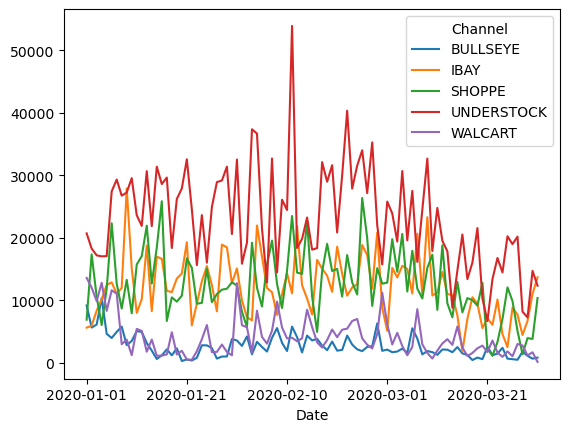

In [12]:
daily_totals_df.plot();

### Writing data to a spreadsheet

In [13]:
#daily_totals_df.to_excel('DailyTotals.xlsx')

## Chapter 13 - Tables, columns, and values

In [14]:
pd.Series({'first_row': 3, 'second_row': -20, 'third_row': 121})

first_row       3
second_row    -20
third_row     121
dtype: int64

In [15]:
pd.Series({0: 'Assets', 5: 'Revenue', -3: 'Sales'})

 0     Assets
 5    Revenue
-3      Sales
dtype: object

In [16]:
values = pd.Series({'first_row': 3, 'second_row': -20, 'third_row': 121})

values['second_row']

-20

In [17]:
values.sum()

104

In [18]:
values

first_row       3
second_row    -20
third_row     121
dtype: int64

### Dataframe

In [19]:
df = pd.DataFrame({
    "first_column": pd.Series({"first_row": 3, "second_row": -20, "third_row": 121}),
    "second_column": pd.Series({"first_row": 0.23, "second_row": 2, "third_row": -3.5}),
    "third_column": pd.Series({"second_row": 'Assets'}),
})

df

,first_column,second_column,third_column
first_row,3,0.23,NaN
second_row,-20,2.00,Assets
third_row,121,-3.50,NaN


In [20]:
df['first_column']  # column

first_row       3
second_row    -20
third_row     121
Name: first_column, dtype: int64

In [21]:
df['first_column']['second_row']  # column, row

-20

### Index and axes

In [22]:
df.columns

Index(['first_column', 'second_column', 'third_column'], dtype='object')

In [23]:
df.index

Index(['first_row', 'second_row', 'third_row'], dtype='object')

In [24]:
# Accesses the third column name in the DataFrame 'df'
df.columns[2] 

'third_column'

In [25]:
# Accesses the second index value in the DataFrame 'df'
df.index[1]

'second_row'

In [26]:
df

,first_column,second_column,third_column
first_row,3,0.23,NaN
second_row,-20,2.00,Assets
third_row,121,-3.50,NaN


In [27]:
df.transpose()

,first_row,second_row,third_row
first_column,3,-20,121
second_column,0.23,2.0,-3.5
third_column,NaN,Assets,NaN


### Axes

In [28]:
df.axes

[Index(['first_row', 'second_row', 'third_row'], dtype='object'),
 Index(['first_column', 'second_column', 'third_column'], dtype='object')]

In [29]:
[df.index, df.columns]

[Index(['first_row', 'second_row', 'third_row'], dtype='object'),
 Index(['first_column', 'second_column', 'third_column'], dtype='object')]

In [30]:
df.count(axis='rows')

first_column     3
second_column    3
third_column     1
dtype: int64

In [31]:
df.count(axis='columns')

first_row     2
second_row    3
third_row     2
dtype: int64

### Values and types

In [32]:
df

,first_column,second_column,third_column
first_row,3,0.23,NaN
second_row,-20,2.00,Assets
third_row,121,-3.50,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, first_row to third_row
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_column   3 non-null      int64  
 1   second_column  3 non-null      float64
 2   third_column   1 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 204.0+ bytes


In [34]:
df['first_column'].sum()

104

## Chapter 14 - Reading and writing Excel files

### Reading Excel files

```Python

ledger_df = pd.read_excel('Q1Sales.xlsx')
```

In [35]:
ledger_df.head()

,InvoiceNo,Channel,Product Name,ProductID,Account,AccountNo,Date,Deadline,Currency,Unit Price,Quantity,Total
0,1532,SHOPPE,Cannon Water Bomb Balloons 100 Pack,T&G/CAN-97509,Sales,5004,2020-01-01,11/23/19,USD,20.11,14,281.54
1,1533,WALCART,LEGO Ninja Turtles Stealth Shell in Pursuit 79102,T&G/LEG-37777,Sales,5004,2020-01-01,06/15/20,USD,6.70,1,6.70
2,1534,BULLSEYE,NaN,T&G/PET-14209,Sales,5004,2020-01-01,05/07/20,USD,11.67,5,58.35
3,1535,BULLSEYE,Transformers Age of Extinction Generations Del...,T&G/TRA-20170,Sales,5004,2020-01-01,12/22/19,USD,13.46,6,80.76
4,1535,BULLSEYE,Transformers Age of Extinction Generations Del...,T&G/TRA-20170,Sales,5004,2020-01-01,12/22/19,USD,13.46,6,80.76


By default, 'read_excel' reads data only from the first sheet of an
Excel file. If you want to read data from any other sheet in the
file, you can pass the name of the sheet you want to read as the
'sheet_name' argument to read_excel:

```Python
feb_ledger_df = pd.read_excel('Q1Sales.xlsx', sheet_name='February')
mar_ledger_df = pd.read_excel('Q1Sales.xlsx', sheet_name='March')
```

You won’t always remember the actual sheet names in your Excel
files, but you might remember their position in the file. In that case,
you can specify their position instead of their names in the value
you pass to sheet_name:

```Python
ledger_df = pd.read_excel('Q1Sales.xlsx', sheet_name=0)
```

### Writing Excel files

In [36]:
# Exports the ledger_df DataFrame to an Excel file named 'JanQ1Sales.xlsx'
ledger_df.to_excel('JanQ1Sales.xlsx')

In [37]:
# Exports ledger_df to an Excel file named 'FevQ1Sales.xlsx' with the sheet named 'Sales'
ledger_df.to_excel('FevQ1Sales.xlsx', sheet_name='Sales')